---

ToDo:

* Split notebook into two: tutorial + additional exercises
* Move all exercises into the second one
* Re-stress how to set the path
* Start from "Data sliced and diced", using a pre-packaged dataset, and shove into the additional notebook the "how to" create it.
* Comment code cells

---

# Geographic Data Science - Lab 01

[Dani Arribas-Bel](http://darribas.org)

# Data "munging"

Real world datasets are messy. There is no way around it: datasets have "holes" (missing data), the amount of formats in which data can be stored is endless, and the best structure to share data is not always the optimum to analyze them, hence the need to [munge](http://dictionary.reference.com/browse/munge) them. As has been correctly pointed out in many outlets ([e.g.](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0)), much of the time [spent](https://twitter.com/BigDataBorat/status/306596352991830016) in what is called (Geo-)Data Science is related not only to sophisticated modeling and insight, but has to do with much more basic and less exotic tasks such as obtaining data, processing,and turning them into a shape and form that makes analysis possible. 

For how labor intensive and relevant this aspect is, there is surprisingly very little published on patterns, techniques, and best practices for quick and efficient data cleaning, manipulation, and transformation. In this session, you will use a few real world datasets and learn how to process them into Python so they can be transformed and manipulated, if necessary, and analyzed. For this, we will introduce some of the bread and butter of data analysis and scientific computing in Python. These are fundamental tools that are constantly used in almost any task relating to data analysis.

The first part shows how to quickly get data in and out of Python, so you can work on it and export it when ready; then the main part of the session discusses several patterns to clean and structure data properly, including tidying, subsetting, and aggregating; and we finish with some basic visualization. An additional extension presents more advanced tricks to manipulate tabular data.

Before we get our hands data-dirty, let us import all the additional libraries we will need, so we can get that out of the way and focus on the task at hand:

In [1]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import seaborn as sns  # This allows us to easily and beautifully plot

### The Liverpool Census Data Pack

Throughout this notebook (and later on as well), we will use the [CDRC](http://cdrc.ac.uk/)'s Census Data Pack for the city of Liverpool ([link](https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012)) and explore some of the city's socio-demogaphic characteristics. This is a large package crafted by the CDRC that brings together several Census tables in a consistent way for the city of Liverpool. We will only be able to use just a few of them but, since they are consistently organized, the procedure used should teach you how to explore other variables on your own. In particular, in this session, we will be using a table that lists **population by country of birth**.

The pack is composed of two types of data: tabular and spatial. Tabular data are numerical tables that contain information relating to many socio-economic variables for different units (areas); spatial data contains the geometries of the areas in which Liverpool is divided into. Since there are many variables contained in several tables, that can be linked to more than one geography, the pack also includes two "compass files" that help you find what you are looking for: one table that lists and describes the different datasets available; and a much more detailed table that lists and describes each and every single variable available in the pack.

The remainder assumes you have downloaded and unpacked the data. Specify the path to the folder in the following cell, so you can correctly run the code without errors:

In [2]:
# Important! You need to specify the path to the data in *your* machine
# If you have placed the data folder in the same directory as this notebook,
# you would do:
# path = 'Liverpool/'
path = '../../../../data/Liverpool/'

### Reading data (data I/O)

It is not only that data are not ready to analyze when you get a hold on them. Sometimes, there is not such thing as *the dataset* to analyze. Instead, what you have is a collection of separated files, sometimes with different structures, that you need to bring together to begin with. This is one of the areas where a bit of scripting skills can help you a long way. While in a traditional point-and-click program like Microsoft Excel or SPSS, you would have to repeat the steps every time you wanted to incorporate a new dataset, with a bit of Python ninja tricks, you can write code that will do it for you as many times as you need.

We will begin jumping straight into the analysis of population in Liverpool, organized by country of birth, at the Local Super Output Area (LSOA) level. Because the Census Data Pack contains a lot of data and very many different tables, you will have to bear with us and trust that what we are extracting is exactly the data of interest. This will speed up the process to walk through the reading, processing and manipulating of a dataset. Once you are familiar with these skills, the final section goes into how to explore the entire pack with more detail.

To read a "comma separated values" (`.csv`) file, we can run:

In [3]:
lsoa_orig = pd.read_csv(path+'tables/QS203EW_lsoa11.csv', index_col='GeographyCode')
lsoa_orig.head()

,QS203EW0001,QS203EW0002,QS203EW0003,QS203EW0004,QS203EW0005,QS203EW0006,QS203EW0007,QS203EW0008,QS203EW0009,QS203EW0010,...,QS203EW0069,QS203EW0070,QS203EW0071,QS203EW0072,QS203EW0073,QS203EW0074,QS203EW0075,QS203EW0076,QS203EW0077,QS203EW0078
GeographyCode,,,,,,,,,,,,,,,,,,,,,
E01006512,1880,910,766,699,26,21,20,0,0,0,...,5,0,5,0,0,0,0,0,0,0
E01006513,2941,2225,2033,1806,98,28,101,0,0,0,...,5,1,4,7,0,7,6,1,0,0
E01006514,2108,1786,1632,1503,44,18,67,0,0,0,...,19,2,17,5,0,4,2,2,1,0
E01006515,1208,974,910,877,16,5,12,0,0,0,...,4,2,2,2,0,2,2,0,0,0
E01006518,1696,1531,1468,1446,7,6,9,0,0,0,...,3,0,3,4,0,4,4,0,0,0


Let us stop for a minute to learn how we have read the file. Here are the main aspects to keep in mind:

* We are using the method `read_csv` from the `pandas` library, which we have imported with the alias `pd`.
* In this simple form, all that is required is to pass the path to the file we want to read, which in this case we have created by concatenating two strings. We can see the full path we have used:

In [4]:
# Yours might look different if `path` is pointing somewhere else
path + 'tables/QS203EW_lsoa11.csv'

'../../../../data/Liverpool/tables/QS203EW_lsoa11.csv'

* The argument `index_col` is not strictly necessary but allows us to choose one of the columns as the index of the table. More on indices below.
* We are using `read_csv` because the file we want to read is in the `csv` format. However, `pandas` allows for many more formats to be read (and written, just replace `read` by `to`! For example, `read_csv` reads in, `to_csv` writes out). A full list of formats supported includes:

In [5]:
# This bit of code includes some more advanced tricks, not required for this session :-)
[i for i in dir(pd) if 'read_' in i]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

If you want to learn how to use any of them, remember how to use the `help` or `?` systems for inline help.

* Finally, the read file is assigned into an object we call `codebook`, so we can manipulate it later.

Before we continue with the data, let us have a look at the object `codebook`. It is a different "animal" than we have seen so far:

In [6]:
type(lsoa_orig)

pandas.core.frame.DataFrame

It is a "pandas data frame". Similar to R's "data.frame" class, it is one of the most essential data structures in Python for data analysis, and we will use it intensively. Data frames are sophisticated costructs that can perform several advanced tasks and have many properties. We will be discovering them as we progress on the course but, for now, let us keep in mind they are tables, indexed on rows and columns that can support mixed data types and can be flexibly manipulated.

Now we have read the file, we can inspect it. For example, to show the first lines of the table:

In [7]:
lsoa_orig.head()

,QS203EW0001,QS203EW0002,QS203EW0003,QS203EW0004,QS203EW0005,QS203EW0006,QS203EW0007,QS203EW0008,QS203EW0009,QS203EW0010,...,QS203EW0069,QS203EW0070,QS203EW0071,QS203EW0072,QS203EW0073,QS203EW0074,QS203EW0075,QS203EW0076,QS203EW0077,QS203EW0078
GeographyCode,,,,,,,,,,,,,,,,,,,,,
E01006512,1880,910,766,699,26,21,20,0,0,0,...,5,0,5,0,0,0,0,0,0,0
E01006513,2941,2225,2033,1806,98,28,101,0,0,0,...,5,1,4,7,0,7,6,1,0,0
E01006514,2108,1786,1632,1503,44,18,67,0,0,0,...,19,2,17,5,0,4,2,2,1,0
E01006515,1208,974,910,877,16,5,12,0,0,0,...,4,2,2,2,0,2,2,0,0,0
E01006518,1696,1531,1468,1446,7,6,9,0,0,0,...,3,0,3,4,0,4,4,0,0,0


Let us also quickly check the dimensions of the table:

In [8]:
lsoa_orig.shape

(298, 78)

This implies 298 rows by 78 columns. That is a lot of columns, all named under obscure codes. For now, just trust that the columns we want are:

In [9]:
region_codes = ['QS203EW0002', 'QS203EW0032', 'QS203EW0045', \
                'QS203EW0063', 'QS203EW0072']

To keep only those with us, we can *slice* the table using the `loc` operator:

In [10]:
lsoa_orig_sub = lsoa_orig.loc[:, region_codes]
lsoa_orig_sub.head()

,QS203EW0002,QS203EW0032,QS203EW0045,QS203EW0063,QS203EW0072
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


Note how we use the operator `loc` (for locator) on the dataframe, followed by squared brackets and, inside it, two alternatives: 

* We can use `:` to keep *all* the elements (rows in this case).
* And we can use a list of strings (or simply one would work too) with the names what we want to select.

We can further inspect the dataset with an additional command called `info`, that lists the names of the columns and how many non-null elements each contains:

In [11]:
lsoa_orig_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
QS203EW0002    298 non-null int64
QS203EW0032    298 non-null int64
QS203EW0045    298 non-null int64
QS203EW0063    298 non-null int64
QS203EW0072    298 non-null int64
dtypes: int64(5)
memory usage: 14.0+ KB


---

**[Renaming columns]**

**IMPORTANT**: some of the elemnts in this part are more advanced hence optional. If you want to move quickly through the lab, simply run the code cells without paying much attention to what it does. Once you have become more familiar with the rest of the tutorial, return here and work through the logic.

The table we have compiled contains exactly what we wanted. However, the names of the columns are a bit unintuitive, to say the least. It would be much handier if we could rename the columns into something more human readable. The easiest way to do that in `pandas` is by creating a dictionary that maps the original name into the desired one, and then applying it to the `DataFrame` with the command `rename`. Let us walk through the steps necessary, one by one:

* Create a dictionary that maps the codes to the names. For this, we can use the list we have created before (`region_variables`), and what we have learnt about querying tables, combined with a small `for` loop.

First we need to bring up the variable names into a separate table (see the final section for more detail):

In [12]:
variables = pd.read_csv(path+'variables_description.csv', index_col=0)

In [13]:
code2name = {}
lookup_table = variables.set_index('ColumnVariableCode') # Reindex to be able to query
for code in region_codes:
    code2name[code] = lookup_table.loc[code, 'ColumnVariableDescription']
code2name

{'QS203EW0002': 'Europe: Total',
 'QS203EW0032': 'Africa: Total',
 'QS203EW0045': 'Middle East and Asia: Total',
 'QS203EW0063': 'The Americas and the Caribbean: Total',
 'QS203EW0072': 'Antarctica and Oceania: Total'}

* Because we know that each of these variables are totals for each group, we can further declutter the names by removing the piece of the string `": Total"`. A simple loop can help us:

In [14]:
for code in code2name:
    code2name[code] = code2name[code].replace(': Total', '')
code2name

{'QS203EW0002': 'Europe',
 'QS203EW0032': 'Africa',
 'QS203EW0045': 'Middle East and Asia',
 'QS203EW0063': 'The Americas and the Caribbean',
 'QS203EW0072': 'Antarctica and Oceania'}

* With the dictionary in hand, renaming the columns is as easy as:

In [15]:
lsoa_orig_sub = lsoa_orig_sub.rename(columns=code2name)
lsoa_orig_sub.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


---

**[Optional exercise. Difficulty: 2/5]**

Take the subset table just created (`lsoa_orig_sub`) and write it into a `csv` file.

---

### Data, sliced and diced

Now we are ready to start playing and interrogating the dataset! What we have at our fingertips is a table that summarizes, for each of the 238 LSOAs in Liverpool, how many people live in each, by the region of the world where they were born. To make what follows easier on your typing, let us rename the table to something shorter:

In [16]:
db = lsoa_orig_sub

Now, let us learn a few cool tricks built into `pandas` that work out-of-the box with a table like ours.

* Inspecting what it looks like. We can check the top (bottom) X lines of the table by passing X to the method `head` (`tail`). For example, for the top/bottom five lines:

In [17]:
db.head(5)

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


In [18]:
db.tail(5)

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7
E01033767,1003,29,29,5,1
E01033768,1016,69,111,21,6


* Getting an overview of the table:

In [19]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
Europe                            298 non-null int64
Africa                            298 non-null int64
Middle East and Asia              298 non-null int64
The Americas and the Caribbean    298 non-null int64
Antarctica and Oceania            298 non-null int64
dtypes: int64(5)
memory usage: 14.0+ KB


* Getting an overview of the *values* of the table:

In [20]:
db.describe()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
count,298.00000,298.000000,298.000000,298.000000,298.000000
mean,1462.38255,29.818792,62.909396,8.087248,1.949664
std,248.67329,51.606065,102.519614,9.397638,2.168216
min,731.00000,0.000000,1.000000,0.000000,0.000000
25%,1331.25000,7.000000,16.000000,2.000000,0.000000
50%,1446.00000,14.000000,33.500000,5.000000,1.000000
75%,1579.75000,30.000000,62.750000,10.000000,3.000000
max,2551.00000,484.000000,840.000000,61.000000,11.000000


Note how the output is also a `DataFrame` object, so you can do with it the same things you would with the original table (e.g. writing it to a file).

In this case, the summary might be better presented if the table is "transposed":

In [21]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Europe,298,1462.382550,248.673290,731,1331.25,1446.0,1579.75,2551
Africa,298,29.818792,51.606065,0,7.00,14.0,30.00,484
Middle East and Asia,298,62.909396,102.519614,1,16.00,33.5,62.75,840
The Americas and the Caribbean,298,8.087248,9.397638,0,2.00,5.0,10.00,61
Antarctica and Oceania,298,1.949664,2.168216,0,0.00,1.0,3.00,11


* Equally, common descriptive statistics are also available:

In [22]:
db.min()

Europe                            731
Africa                              0
Middle East and Asia                1
The Americas and the Caribbean      0
Antarctica and Oceania              0
dtype: int64

In [23]:
db['Europe'].max()

2551

Note here how we have restricted the calculation of the maximum value to one column only.

Similarly, we can restrict the calculations to a single row:

In [24]:
db.loc['E01006512', :].std()

457.88426485303029

* Simple creation of new variables: we can generate new variables by applying operations on existing ones. For example, we can calculate the total population by area. Here is a couple of ways to do it:

In [25]:
# Longer, hardcoded
total = db['Europe'] + db['Africa'] + db['Middle East and Asia'] + \
        db['The Americas and the Caribbean'] + db['Antarctica and Oceania']
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

In [26]:
# One shot
total = db.sum(axis=1)
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

Note how we are using the command `sum`, just like we did with `max` or `min` before but, in this case, we are not applying it over columns (e.g. the max of each column), but over rows, so we get the total sum of populations by areas.

Once we have created the variable, we can make it part of the table:

In [27]:
db['Total'] = total
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


---

**[Optional exercise. Difficulty: 3/5]**

Obtain the total population in Liverpool by each subgroup.

**Tip**: focus on the axis argument.

---

* Assigning new values: we can easily generate new variables with scalars, and modify those.

In [28]:
# New variable with all ones
db['ones'] = 1
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,1
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


And we can modify specific values too:

In [29]:
db.loc['E01006512', 'ones'] = 3
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,3
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


* Deleting variables is also trivial:

In [30]:
del db['ones']
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


* Simple querying.

We have already seen how to subset parts of a `DataFrame` if we know exactly which bits we want. For example, if we want to extract the total and European population of the first four areas in the table, we use `loc` with lists:

In [31]:
eu_tot_first4 = db.loc[['E01006512', 'E01006513', 'E01006514', 'E01006515'], \
                      ['Total', 'Europe']]
eu_tot_first4

,Total,Europe
GeographyCode,,
E01006512,1880,910
E01006513,2941,2225
E01006514,2108,1786
E01006515,1208,974


* Querying based on conditions. 

However, sometimes, we do not know exactly which observations we want, but we do know what conditions they need to satisfy (e.g. areas with more than 2,000 inhabitants). For these cases, `DataFrames` support selection based on conditions. Let us see a few examples. Suppose we want to select...

*... areas with more than 2,500 people in Total*:

In [32]:
m5k = db.loc[db['Total'] > 2500, :]
m5k

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


*... areas where there are no more than 750 Europeans*:

In [33]:
nm5ke = db.loc[db['Europe'] < 750, :]
nm5ke

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033757,731,39,223,29,3,1025


*... areas with exactly ten person from Antarctica and Oceania*:

In [34]:
oneOA = db.loc[db['Antarctica and Oceania'] == 10, :]
oneOA

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006679,1353,484,354,31,10,2232


**Pro-tip**: these queries can grow in sophistication with almost no limits. For example, here is a case where we want to find out the areas where European population is less than half the population:

In [35]:
eu_lth = db.loc[(db['Europe'] * 100. / db['Total']) < 50, :]
eu_lth

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880


* Combining queries.

Now all of these queries can be combined with each other, for further flexibility. For example, imagine we want areas with more than 25 people from the Americas and Caribbean, but less than 1,500 in total:

In [36]:
ac25_l500 = db.loc[(db['The Americas and the Caribbean'] > 25) & \
                   (db['Total'] < 1500), :]
ac25_l500

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033750,1235,53,129,26,5,1448
E01033752,1024,19,114,33,6,1196
E01033754,1262,37,112,32,9,1452
E01033756,886,31,221,42,5,1185
E01033757,731,39,223,29,3,1025
E01033761,1138,52,138,33,11,1372


* Sorting.

Among the many operations `DataFrame` objects support, one of the most useful ones is to sort a table based on a given column. For example, imagine we want to sort the table by total population:

In [37]:
db_pop_sorted = db.sort('Total', ascending=False)
db_pop_sorted.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


If you inspect the help of `db.sort`, you will find that you can pass more than one column to sort the table by. This allows you to do so-called hiearchical sorting: sort first based on one column, if equal then based on another column, etc.

---

**[Optional exercise. Difficulty: 4/5]**

* Create a new table that, instead of the total counts, has the percentages of population groups in each area. Call this `db_pct`. 
* Practice your query skills further by answering the following questions:
    * What is the most populated area?
    * What is the area with the largest variance of group sizes?
    * List the five areas with the largest proportion of people born in Antarctica and Oceania.
    * Find areas that have more that 25% of population from Europe but are still among the top-5 in terms of African population.
    * **[Bonus]** Is there any area in the top-5 of percentage of American/Caribbean *and* of Middle East/Asia population?

---

### Visual exploration

The next step to continue exploring a dataset is to get a feel for what it looks like, visually. We have already learnt how to unconver and inspect specific parts of the data, to check for particular cases we might be intersted in. Now we will see how to plot the data to get a sense of the overall distribution of values. For that, we will be using the Python library [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/index.html).

* Histograms.

One of the simplest graphical devices to display the distribution of values in a variable is a histogram. Values are assigned into groups of equal intervals, and the groups are plotted as bars rising as high as the number of values into the group. 

A histogram is easily created with the following command. In this case, let us have a look at the shape of the overall population:

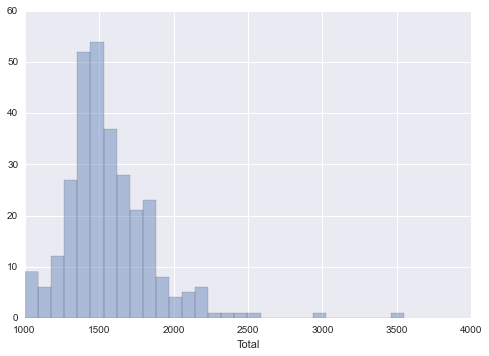

In [38]:
_ = sns.distplot(db['Total'], kde=False)

Note we are using `sns` instead of `pd`, as the function belongs to `seaborn` instead of `pandas`.

We can quickly see most of the areas contain somewhere between 1,200 and 1,700 people, approx. However, there are a few areas that have many more, even up to 3,500 people.

An additinal feature to visualize the density of values is called `rug`, and adds a little tick for each value on the horizontal axis:

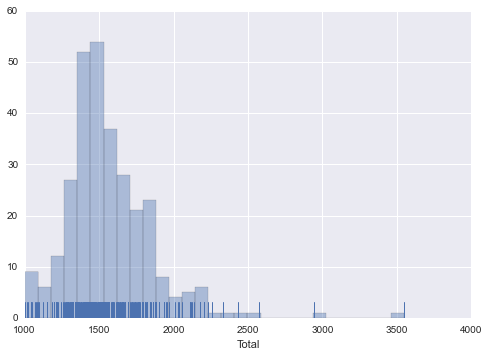

In [39]:
_ = sns.distplot(db['Total'], kde=False, rug=True)

* Kernel Density Plots

Histograms are useful, but they are artificial in the sense that a continuous variable is made discrete by turning the values into discrete groups. An alternative is kernel density estimation (KDE), which produces an empirical density function:

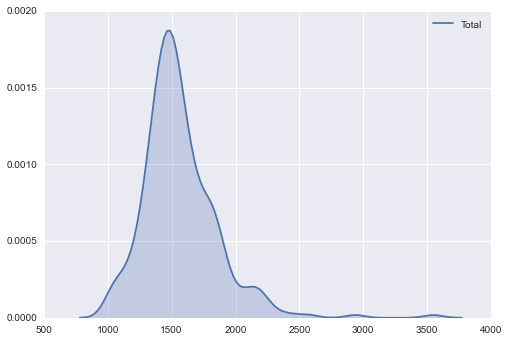

In [40]:
_ = sns.kdeplot(db['Total'], shade=True)

* Line and bar plots

Another very common way of visually displaying a variable is with a line or a bar chart. For example, if we want to generate a line plot of the (sorted) total population by area:

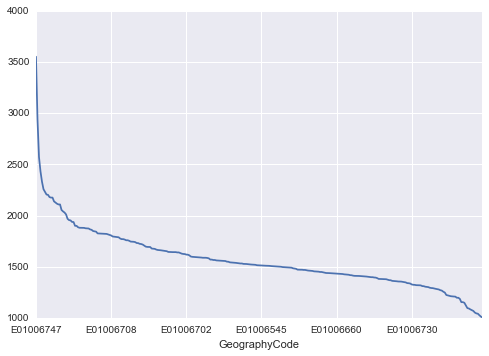

In [41]:
_ = db['Total'].order(ascending=False).plot()

For a bar plot all we need to do is to change an argument of the call:

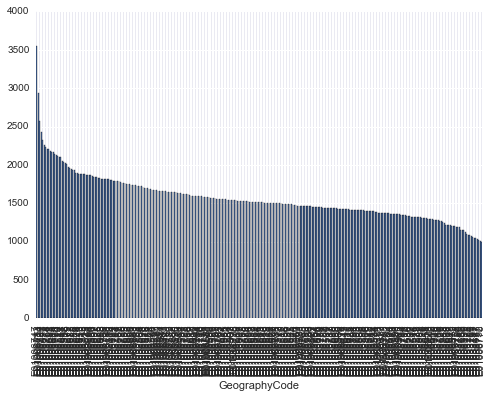

In [42]:
_ = db['Total'].order(ascending=False).plot(kind='bar')

Note that the large number of areas makes the horizontal axis unreadable. We can try to turn the plot around by displaying the bars horizontally (see how it's just changing `bar` for `barh`). To make it readable, let us expand the plot's height:

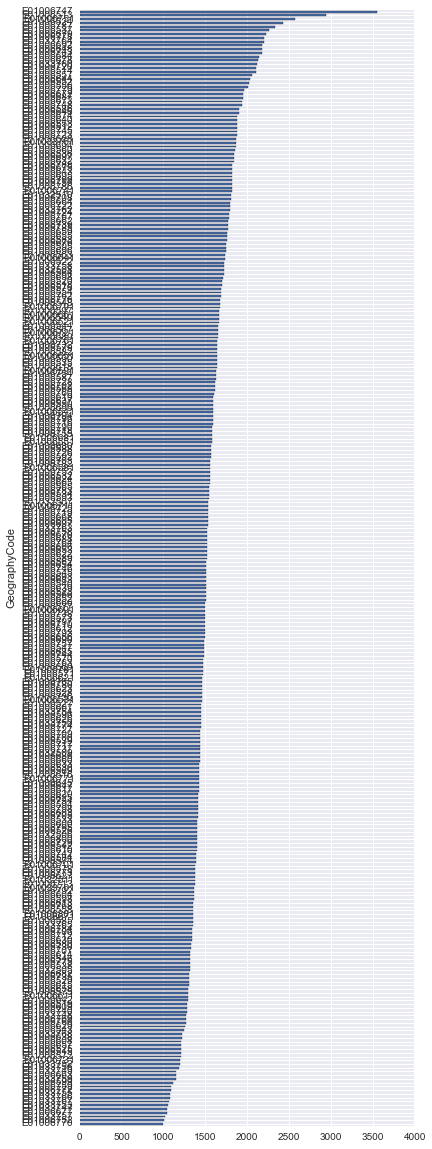

In [43]:
_ = db['Total'].order().plot(kind='barh', figsize=(6, 20))

---

**[Optional exercise. Difficulty: 3/5]**

* Explore the help of `sns.distplot` and `sns.kdeplot` to discover additional arguments. Check also the [tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html#plotting-univariate-distributions).
* Create a figure that overlays both a histogram and a KDE plot of the total population in a single figure.
* Create histogram and KDE plots for the other variables in the dataset.

---

### Un/tidy data

> *Happy families are all alike; every
unhappy family is unhappy in its own
way.*

> Leo Tolstoy.

Once you can read your data in, explore specific cases, and have a first visual approach to the entire set, the next step can be preparing it for more sophisticated analysis. Maybe you are thinking of modeling it through regression, or on creating subgroups in the dataset with particular characteristics, or maybe you simply need to present summary measures that relate to a slightly different arrangement of the data than you have been presented with.

For all these cases, you first need what statistitian, and general R wizard, Hadley Wickham calls *"tidy data"*. The general idea to "tidy" your data is to convert them from whatever structure they were handed in to you into one that allows easy and standardized manipulation, and that supports directly inputting the data into what he calls "*tidy*" analysis tools. But, at a more practical level, what is exactly *"tidy data"*? In Wickham's own words:

> *Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,
variables and types.*

He then goes on to list the three fundamental characteristics of *"tidy data"*:

1. Each variable forms a column.
1. Each observation forms a row.
1. Each type of observational unit forms a table.

If you are further interested in the concept of *"tidy data"*, I recommend you check out the [original paper](http://www.jstatsoft.org/v59/i10/) (open access) and the [public repository](https://github.com/hadley/tidy-data) associated with it.

Let us bring in the concept of "*tidy data*" to our own Liverpool dataset. First, remember its structure:

In [44]:
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


Thinking through *tidy* lenses, this is not a tidy dataset. It is not so for each of the three conditions:

* Starting by the last one (*each type of observational unit forms a table*), this dataset actually contains not one but two observational units: the different areas of Liverpool, captured by `GeographyCode`; *and* subgroups of an area. To *tidy* up this aspect, we can create two different tables:

In [45]:
db_totals = db[['Total']]
db_totals.head()

,Total
GeographyCode,
E01006512,1880
E01006513,2941
E01006514,2108
E01006515,1208
E01006518,1696


In [46]:
# Note we use `drop` to exclude "Total", but we could also use a list with the names
# of all the columns to keep
db_subgroups = db.drop('Total', axis=1)
db_subgroups.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


At this point, the table `db_totals` is tidy: every row is an observation, every table is a variable, and there is only one observational unit in the table.

The other table (`db_subgroups`), however, is not entirely tidied up yet: there is only one observational unit in the table, true; but every row is not an observation, and there are variable values as the names of columns (in other words, every column is not a variable). To obtain a fully tidy version of the table, we need to re-arrange it in a way that every row is a population subgroup in an area, and there are three variables: `GeographyCode`, population subgroup, and population count (or frequency). 

Because this is actually a fairly common pattern, there is a direct way to solve it in `pandas`:

In [47]:
tidy_subgroups = db_subgroups.stack()
tidy_subgroups.head()

GeographyCode                                
E01006512      Europe                            910
               Africa                            106
               Middle East and Asia              840
               The Americas and the Caribbean     24
               Antarctica and Oceania              0
dtype: int64

The method `stack`, well, "stacks" the different columns into rows. This fixes our "tidiness" problems but the type of object that is returning is not a `DataFrame`:

In [48]:
type(tidy_subgroups)

pandas.core.series.Series

It is a `Series`, which really is like a `DataFrame`, but with only one column. The additional information (`GeographyCode` and population group) are stored in what is called an multi-index. We will skip these for now, so we would really just want to get a `DataFrame` as we know it out of the `Series`. This is also one line of code away:

In [49]:
tidy_subgroupsDF = tidy_subgroups.reset_index()
tidy_subgroupsDF.head()

,GeographyCode,level_1,0
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


And some basic renaming of the columns:

In [50]:
tidy_subgroupsDF = tidy_subgroupsDF.rename(columns={'level_1': 'Subgroup', 0: 'Freq'})
tidy_subgroupsDF.head()

,GeographyCode,Subgroup,Freq
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


Now our table is fully tidied up!

### Grouping, transforming, aggregating

One of the advantage of tidy datasets is they allow to perform advanced transformations in a more direct way. One of the most common ones is what is called "group-by" operations. Originated in the world of databases, these operations allow you to group observations in a table by one of its labels, index, or category, and apply operations on the data group by group. 

For example, given our tidy table with population subgroups, we might want to compute the total sum of population by each group. This task can be split into two different ones:

* Group the table in each of the different subgroups.
* Compute the sum of `Freq` for each of them.

To do this in `pandas`, meet one of its workhorses, and also one of the reasons why the library has become so popular: the `groupby` operator.

In [51]:
pop_grouped = tidy_subgroupsDF.groupby('Subgroup')
pop_grouped

The object `pop_grouped` still hasn't computed anything, it is only a convenient way of specifying the grouping. But this allows us then to perform a multitude of operations on it. For our example, the sum is calculated as follows:

In [52]:
pop_grouped.sum()

,Freq
Subgroup,
Africa,8886
Antarctica and Oceania,581
Europe,435790
Middle East and Asia,18747
The Americas and the Caribbean,2410


Similarly, you can also obtain a summary of each group:

In [53]:
pop_grouped.describe()

Freq
Subgroup                                         
Africa                         count   298.000000
                               mean     29.818792
                               std      51.606065
                               min       0.000000
                               25%       7.000000
                               50%      14.000000
                               75%      30.000000
                               max     484.000000
Antarctica and Oceania         count   298.000000
                               mean      1.949664
                               std       2.168216
                               min       0.000000
                               25%       0.000000
                               50%       1.000000
                               75%       3.000000
                               max      11.000000
Europe                         count   298.000000
                               mean   1462.382550
                               std     248.673290
                               min     731.000000
                               25%    1331.250000
                               50%    1446.000000
                               75%    1579.750000
                               max    2551.000000
Middle East and Asia           count   298.000000
                               mean     62.909396
                               std     102.519614
                               min       1.000000
                               25%      16.000000
                               50%      33.500000
                               75%      62.750000
                               max     840.000000
The Americas and the Caribbean count   298.000000
                               mean      8.087248
                               std       9.397638
                               min       0.000000
                               25%       2.000000
                               50%       5.000000
                               75%      10.000000
                               max      61.000000

**Pro-tip**: since we only have one variable (`Freq`), a more compact way to display that summary can be obtaine with the counterpart of `stack`, `unstack`:

In [54]:
pop_grouped.describe().unstack()

Freq                                         \
                               count         mean         std  min      25%   
Subgroup                                                                      
Africa                           298    29.818792   51.606065    0     7.00   
Antarctica and Oceania           298     1.949664    2.168216    0     0.00   
Europe                           298  1462.382550  248.673290  731  1331.25   
Middle East and Asia             298    62.909396  102.519614    1    16.00   
The Americas and the Caribbean   298     8.087248    9.397638    0     2.00   

                                                       
                                   50%      75%   max  
Subgroup                                               
Africa                            14.0    30.00   484  
Antarctica and Oceania             1.0     3.00    11  
Europe                          1446.0  1579.75  2551  
Middle East and Asia              33.5    62.75   840  
The Americas and the Caribbean     5.0    10.00    61

We will not get into it today as it goes beyond the basics we want to conver, but keep in mind that `groupby` allows you to not only call generic functions (like `sum` or `describe`), but also your own functions. This opens the door for virtually any kind of transformation and aggregation possible.

---

**[Optional exercise. Difficulty: 4/5]**

Practice your data tidying skills with a different dataset. For example, you can have a look at the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:

In [55]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)

Follow these steps:

* Download the table as a `csv` file (File --> Download as --> .csv, current sheet).
* Read it into Python.
* Explore it by creating a few plots.
* Examine its level of tidiness and turn it into a fully tidy dataset.
* Obtain a monthly total count of casualties and create a line or a bar plot of them.

---

## Appendix: Delving deeper into the Census Data Pack

**[Optional extension]**

We started this notebook assuming we already knew what variables in particular we wanted, out of the hundreds available on the Liverpool Census Data Pack. Unfortunately, that is not always the case, and sometimes  you have to explore an entire dataset by yourself to find what you are looking for. To dip your toes into the sea of the Census Data Pack, in this section we will walk through how to systematically identify a variable and extract it.

The folder contains data at different scales. We will be using the Local Super Output Area (LSOAs). The folder is structured in the following way:

In [56]:
os.listdir(path)

['datasets_description.csv',
 'metadata.xml',
 'readme.txt',
 'shapefiles',
 'tables',
 'variables_description.csv']

For now, we will ignore the spatial information contained in the folder `shapefiles` and focus on the `tables` one. If you have a peek at the folder, it contains many files. You can get their names into a Python list with the following command:

In [57]:
csvs = os.listdir(path + 'tables')

And count them using the core fuction `len`, which returns the length of a list:

In [58]:
len(csvs)

303

That is right, 303 files! Luckily, to navigate that sea of seemingly non-sensical letters, there is a codebook that explains things a bit. You can open it with a text editor or a spreadsheet program but, since it is a `csv` file, we can also ingest it with Python:

In [59]:
codebook = pd.read_csv(path + 'datasets_description.csv', index_col=0)


Now we have read the file, we can inspect it. For example, to show the first lines of the table:

In [60]:
codebook.head()

,DatasetTitle
DatasetId,
CT0010,Ethnic group write-ins
KS101EW,Usual resident population
KS102EW,Age structure
KS103EW,Marital and civil partnership status
KS104EW,Living arrangements


You can use the index chosen to query rows. For example, if we want to see what dataset code `QS203EW` corresponds to:

In [61]:
codebook.loc['QS203EW', 'DatasetTitle']

'Country of birth (detailed)'

If we want to see what that dataset contains, there is another file in the folder called `variables_description.csv` that has further information. We can bring it in the same way we did before and, again, we will index it using the first column of the table, the ID of the dataset where the variable belongs to:

In [62]:
variables = pd.read_csv(path+'variables_description.csv', index_col=0)

To have a sense of how large it is, we can call its `shape` property, which returns the number of rows and columns, respectively:

In [63]:
variables.shape

(2563, 3)

2,563 different variables!!! Let us see what the structure of the table is:

In [64]:
variables.head()

,ColumnVariableCode,ColumnVariableMeasurementUnit,ColumnVariableDescription
DatasetId,,,
CT0010,CT00100001,Count,All categories: Ethnic group
CT0010,CT00100002,Count,English/Welsh/Scottish/Northern Irish/British
CT0010,CT00100003,Count,Irish
CT0010,CT00100004,Count,Gypsy or Irish Traveller
CT0010,CT00100005,Count,Other White


If we are interested in exploring the country of birth (code `QS203EW`), we can subset the table using `loc` in a similar way as before. The only difference is that now we do not want to restrict the column to only one, so we use the colon `:` instead of a particular name, including thus *all* the columns. Let us also save the subset by assigning it to a new object, `birth_orig`:

In [65]:
birth_orig = variables.loc['QS203EW', :]
birth_orig.shape

(78, 3)

To be clear, the table above contains all the variables that the dataset `QS203EW` is comprised of. This means that, for every row in this table, there is a column in the actual dataset which, for the LSOAs, is on the file `QS203EW_lsoa11.csv`, in the `tables` folder.

This is still a lot. Arguably, to get a first sense of the data and start exploring it, we do not need every single disaggregation available. Let us look at the names and codes of the first 25 variables to see if we can spot any pattern that helps us simplify (note how we now use `:` first to indicate we want *all* the rows):

In [66]:
birth_orig.loc[:, ['ColumnVariableCode', 'ColumnVariableDescription']].head(25)

,ColumnVariableCode,ColumnVariableDescription
DatasetId,,
QS203EW,QS203EW0001,All categories: Country of birth
QS203EW,QS203EW0002,Europe: Total
QS203EW,QS203EW0003,Europe: United Kingdom: Total
QS203EW,QS203EW0004,Europe: United Kingdom: England
QS203EW,QS203EW0005,Europe: United Kingdom: Northern Ireland
QS203EW,QS203EW0006,Europe: United Kingdom: Scotland
QS203EW,QS203EW0007,Europe: United Kingdom: Wales
QS203EW,QS203EW0008,Europe: Great Britain not otherwise specified
QS203EW,QS203EW0009,Europe: United Kingdom not otherwise specified


Note how we have been able to pass a list of variables we wanted to select as columns, and `pandas` has returned the dataframe "sliced" with only those, cutting off the rest.

It looks like the variable name follows a hierarchical pattern that dissaggregates by regions of the world. A sensible first approach might be to start considering only the largest regions. To do that, we need a list of the variable name for those aggregates since, once we have it, subsetting the dataframe will be straightforward. There are several ways we can go about it:

* Since there are not that many regions, we can hardcode them into a list, the same we have used above:

In [67]:
region_codes = ['QS203EW0002', 'QS203EW0032', 'QS203EW0045', \
                'QS203EW0063', 'QS203EW0072']

---

**[Advanced extension. Optional]**

* However, this approach would not get us very far if the list was longer. For that, a much more useful way is to write a loop that builds the list for us. To do this, we can remember some of the tricks learnt in the previous session about writing `for` loops and `if` statements and combine them with new ones about working with strings.

In [68]:
regions = []
for var in birth_orig['ColumnVariableDescription']:
    # Split the name of the variable in pieces by ': '
    pieces = var.split(': ')
    # Keep the first one (top hierarchy) and append ': Total'
    name = pieces[0] + ': Total'
    # If the name create matches the variable (exists in the original list), 
    # add the name to the list
    if name == var:
        regions.append(name)
regions

['Europe: Total',
 'Africa: Total',
 'Middle East and Asia: Total',
 'The Americas and the Caribbean: Total',
 'Antarctica and Oceania: Total']

Let us work slowly by each step of this loop:

* We first create an empty list where we will store the names of the regions.
* We begin a loop over every single row the column containing the names (`ColumnVariableDescription`).
* For each name, which is a string, we split it in pieces using `": "` as the points in the string where we want to break it, obtaining a list with the resulting pieces. For instance if we have `Europe: Total`, we essentially do:

In [69]:
'Europe: Total'.split(': ')

['Europe', 'Total']

* We keep the first element, as it contains the name we want to maintain.
* In order to build the actual name of the variable, we join it to `": Total"`, obtaining the string we want to keep:

In [70]:
'Europe' + ': Total'

'Europe: Total'

* We then check that the string we have built is the same as the variable we began with. If so, we save it on the list we created in the beginning. This step is a bit counter-intuitive, but is done to ensure a) that the name of the variable exists, and b) that it is saved only once.

Now we have the names, we need to convert them into the codes. There are several ways to go about it, but here we will show one that relies on the indexing capabilities of `pandas`. Essentially we take `birth_orig` and index it on the names of the variables, to then subset it, keeping only those in our list (the variables we want to retain).

In [71]:
subset = birth_orig.set_index('ColumnVariableDescription').reindex(regions)
subset

,ColumnVariableCode,ColumnVariableMeasurementUnit
ColumnVariableDescription,,
Europe: Total,QS203EW0002,Count
Africa: Total,QS203EW0032,Count
Middle East and Asia: Total,QS203EW0045,Count
The Americas and the Caribbean: Total,QS203EW0063,Count
Antarctica and Oceania: Total,QS203EW0072,Count


 Once this is done, all left to do is to retrieve the codes:

In [72]:
region_codes = list(subset.ColumnVariableCode)
region_codes

['QS203EW0002', 'QS203EW0032', 'QS203EW0045', 'QS203EW0063', 'QS203EW0072']

Which is the same that we hardcoded originally, only it has been entirely picked up by the python program, not a human.

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'15 - Lab 2</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

